In [41]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import pandas as pd

In [42]:
df = pd.read_csv('Au_nanoparticle_dataset.csv')

In [43]:
df.head()

,ID,T,tau,time,N_total,N_bulk,N_surface,Volume,R_min,R_max,...,q6q6_S14,q6q6_S15,q6q6_S16,q6q6_S17,q6q6_S18,q6q6_S19,q6q6_S20,q6q6_S20+,Total_E,Formation_E
0,1,273,0.000025,1,1599,1014,585,2.710000e-26,15.5898,19.4516,...,0,0,0,0,0,0,0,0,-5908.6345,343.4555
1,2,273,0.000025,2,1642,1034,608,2.780000e-26,15.3996,24.1755,...,0,0,0,0,0,0,0,0,-6035.4034,384.8166
2,3,273,0.000025,3,4637,3365,1272,7.850000e-26,21.9199,31.0305,...,0,0,0,0,0,0,0,0,-17330.1660,800.5040
3,4,273,0.000025,4,7189,5292,1897,1.220000e-25,23.2542,37.8795,...,0,0,0,0,0,0,0,0,-26937.2010,1171.7890
4,5,273,0.000025,5,11004,8508,2496,1.860000e-25,27.1200,39.7614,...,0,0,0,0,0,0,0,0,-41427.9010,1597.7390


In [44]:
# filter specific colomns to create a new dataframe
selected_colomns = ['N_total', 'N_bulk', 'N_surface', 'R_avg']
new_df = df[selected_colomns]

In [45]:
new_df.head(20)

,N_total,N_bulk,N_surface,R_avg
0,1599,1014,585,17.3706
1,1642,1034,608,17.6061
2,4637,3365,1272,25.3692
3,7189,5292,1897,29.7011
4,11004,8508,2496,34.2831
5,13375,10768,2607,36.6334
6,13795,11155,2640,37.0108
7,13947,11304,2643,37.1672
8,14020,11357,2663,37.2103
9,14056,11389,2667,37.2467


In [46]:
# Calculate mean for each feature
mean = new_df.mean()
print("Mean for each feature :")
print(mean)

Mean for each feature :
N_total      3476.786500
N_bulk       2521.550250
N_surface     955.236250
R_avg          20.654363
dtype: float64


In [47]:
# Calculate standard deviation for each feature
std_values = new_df.std()
print("\nStandard Deviation for each feature:")
print(std_values)


Standard Deviation for each feature:
N_total      3679.286769
N_bulk       2976.232459
N_surface     721.870220
R_avg           7.610716
dtype: float64


In [48]:
# Calculate quartiles for each feature
quartile_values = new_df.quantile([0.25, 0.5, 0.75])
print("\nQuartile Values for each feature:")
print(quartile_values)


Quartile Values for each feature:
      N_total   N_bulk  N_surface      R_avg
0.25   1061.0   618.75     437.00  15.160725
0.50   1867.0  1199.00     666.00  18.629250
0.75   4503.0  3183.00    1301.75  25.525125


In [49]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'R_avg Histogram'}, ylabel='Frequency'>

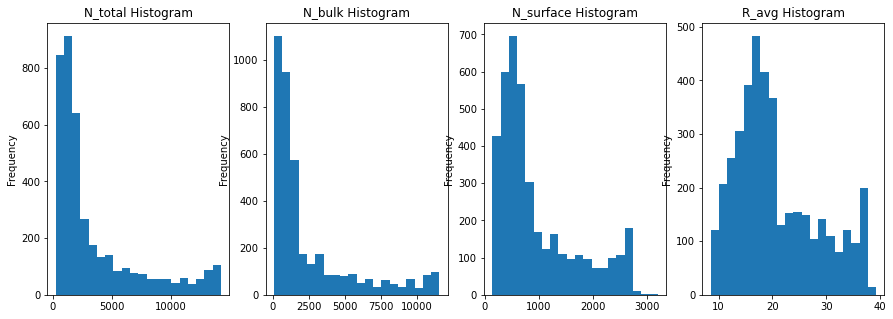

In [50]:
# Create a 1x4 layout of subplots
figure, axes = plt.subplots(1, 4, figsize=(15, 5))

# Plot histograms for each feature
new_df['N_total'].plot(kind='hist', ax=axes[0], bins=20, title='N_total Histogram')
new_df['N_bulk'].plot(kind='hist', ax=axes[1], bins=20, title='N_bulk Histogram')
new_df['N_surface'].plot(kind='hist', ax=axes[2], bins=20, title='N_surface Histogram')
new_df['R_avg'].plot(kind='hist', ax=axes[3], bins=20, title='R_avg Histogram')

In [51]:
import seaborn as sns

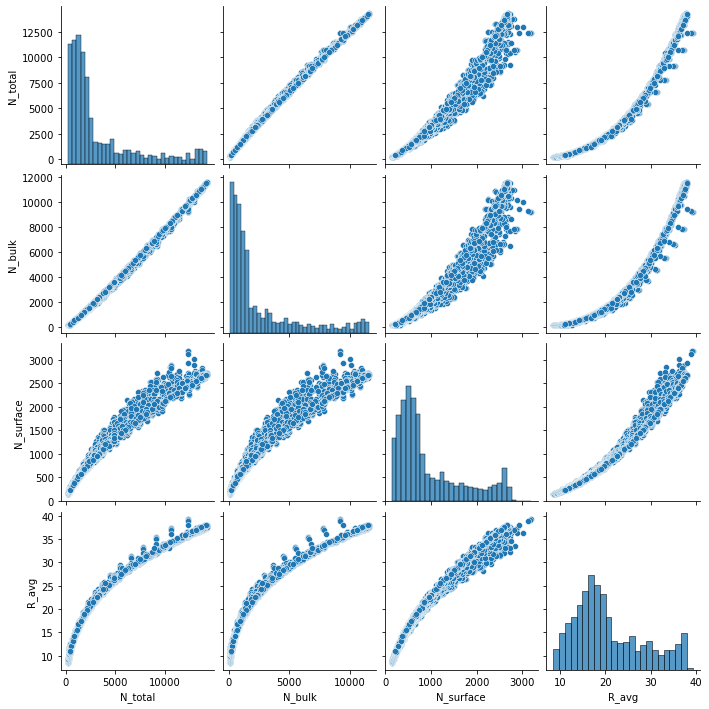

In [52]:
# Create scatter plots and histograms using pairplot
sns.pairplot(new_df)

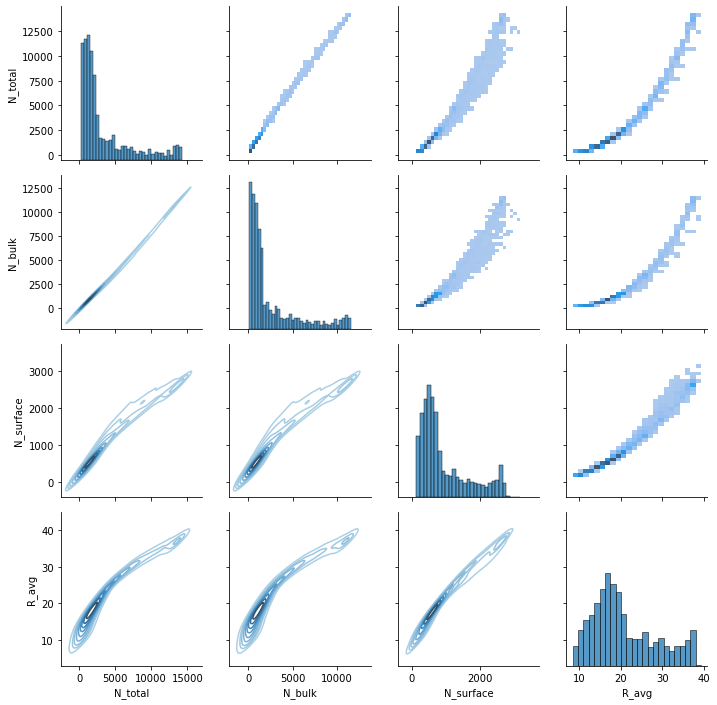

In [53]:
# Define a PairGrid
g = sns.PairGrid(new_df)

# Customize the upper triangle (bivariate histogram)
g.map_upper(sns.histplot)

# The diagonal (histogram with KDE)
g.map_diag(sns.histplot, kde_kws={'color': 'k'})

# The lower triangle (bivariate KDE)
g.map_lower(sns.kdeplot, cmap='Blues_d')